# Boston Blue Bikes Project
 
Everyone has seen them; those rental bikes hooked up to electronic pilons on an urban side walk. Gargantuan in nature compared to your own road bike, but colored with a glossy, fun paint color and company name on the side. In Boston, they are painted sky blue and donned the name "Blue Bikes". 

You may know of Boston's all around brash reputation through cinema, stereotype, or experience. People from this area are as blunt with their driving as they are with their opinions. Throw in the fact that most roads in Boston predate the modern population explosion, and what you have are angry drivers, in tightly packed city streets with miles of highway backup to and from the city. There's barely room to park on these streets and broken rear view mirrors are evidence of this fact. So riding a bike in this city would seem pretty impossible, right?

Well let's take a second look at this Blue Bike company for answers. Are people actually risking their lives to ride a bike in a city where the drivers believe pedestrians are at fault for getting hit in a crosswalk? Who are these people? Where are they going? Are they saving money by riding bikes? Are they saving the planet?
    


## Demographics
#Questions asked of this dataset in this notebook:
#When do people bike most often?
#How much money/gallons of gas are saved by bikers?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import scipy
%matplotlib inline

In [64]:
# 12 csv files are housed in one folder, each of which contains a separate month's worth of data. The 
# csv files do not have datetimestamps of bike rentals. Thus to import each month and label the data
# according to the month the data occurred in, I used this code.
import glob

path = r'C:\Users\harr1\Desktop\Thinkful\Relocated bike project data'
all_files = glob.glob(path+"/*.csv")
li = []
for filename in all_files:
    df=pd.read_csv(filename, index_col=None, header=0)
    file  = filename.split()[-1]
    month_abbr = file.split(".")[0]
    df['Month'] = month_abbr
    li.append(df)
    
frame = pd.concat(li,axis=0, ignore_index=True)
print(frame)

         tripduration starttime stoptime  start station id  \
0                2254   03:32.9  41:07.8                33   
1                2376   04:25.3  44:01.4                33   
2                2083   04:38.8  39:22.0                33   
3                1547   05:21.3  31:08.5                81   
4                 271   05:51.6  10:23.5                67   
...               ...       ...      ...               ...   
1767801          2018   58:32.5  32:10.7                35   
1767802          1618   59:17.5  26:16.4                91   
1767803           808   59:44.4  13:12.4               155   
1767804           411   59:53.0  06:44.0                45   
1767805           643   30:33.2  41:16.8               195   

                                       start station name  \
0                                          Kenmore Square   
1                                          Kenmore Square   
2                                          Kenmore Square   
3          

In [180]:

month_dict = {
    'Jan' : 1, 
    'Feb' : 2,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6,
    'July' : 7,
    'Aug' : 8,
    'Sept' : 9,
    'Oct' : 10,
    'Nov' : 11,
    'Dec' : 12
         }
# for each in frame['Month']:
#       frame['Month_no'].append(month_dict.value())
# frame


In [119]:
#Total distance ridden all year
print('Total distance ridden:',frame['distance'].sum())

Total distance ridden: 2098517.255643298


In [208]:
#Savings per month:
sav = pd.DataFrame()
sav['dist_month'] = frame.groupby(['Month'])['distance'].sum(ascending = False, axis = 0)
sav['sav_month'] = sav_month['dist_month']/24.7
sav_mean = np.mean(sav['sav_month'])
sav_total = sum(sav['sav_month'])
print ("Ave gals of gas saved/month:", sav_mean )
print ("Total gals of gas saved:", sav_total)

sav['Month'] = sav.index 
Mo_no = []
for each in sav['Month']:
    Mo_no.append(month_dict[each])
Mo_no
sav['Mo_no'] = Mo_no

sav

Ave gals of gas saved/month: 7080.017731590076
Total gals of gas saved: 84960.21277908093


,dist_month,sav_month,Month,Mo_no
Month,,,,
April,13484.786000,545.942753,April,4
Aug,349252.021000,14139.757935,Aug,8
Dec,92841.666300,3758.771915,Dec,12
Feb,77166.384800,3124.145134,Feb,2
Jan,45503.465000,1842.245547,Jan,1
July,297601.637343,12048.649285,July,7
June,255988.413600,10363.903385,June,6
March,71374.305800,2889.648008,March,3
May,220232.589700,8916.299178,May,5


In [211]:
sav = sav.sort_values(by=['Mo_no'])

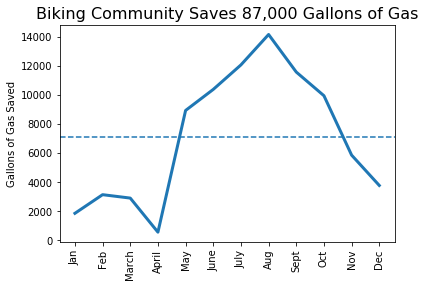

In [225]:
plt.plot(sav['sav_month'], linewidth = 3)
plt.ylabel('Gallons of Gas Saved')
plt.axhline(np.mean(sav_mean), linestyle='dashed')
plt.xticks(sav['Month'], rotation = 'vertical')
plt.title('Biking Community Saves 87,000 Gallons of Gas', fontsize = 16)
plt.show()


In [213]:
#Number of trips over the course of the year
total_trips = frame['starttime'].count()
print('Total number of trips:', total_trips)

Total number of trips: 1767806


In [214]:
sav['Num_trips'] = frame.groupby(['Month'])['starttime'].count()


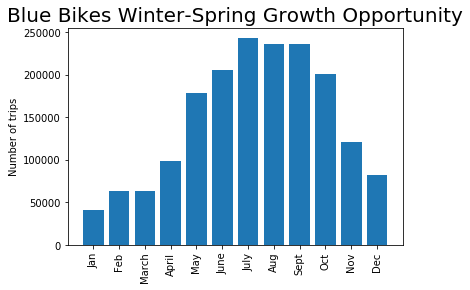

In [226]:
#create bar chart of trips per month, setting index to horizontal
plt.bar(sav['Month'], sav['Num_trips'], align='center')
plt.xticks(sav['Month'], rotation = 'vertical')
plt.title('Blue Bikes Winter-Spring Growth Opportunity', fontsize = 20)
plt.ylabel('Number of trips')
plt.show()

In [216]:
#Ave trip duration in hours per month
sav['Ride Duration'] = frame.groupby(['Month'])['tripduration'].mean()/60

#There are obvious outliers skewing the data. Bikes that were possibly left off the rack continued
#to gather data despite not in use. Let's look at the max ride times.

In [217]:
#Number of hours for these max rentals doesn't make sense and is skewing the data
sav['Max'] = (frame.groupby(['Month'])['tripduration'].max()/60)/24
sav

,dist_month,sav_month,Month,Mo_no,Num_trips,Ride Duration,Max
Month,,,,,,,
Jan,45503.465000,1842.245547,Jan,1,40932,14.421616,1694.972222
Feb,77166.384800,3124.145134,Feb,2,62817,16.356450,1609.462500
March,71374.305800,2889.648008,March,3,62985,14.802737,463.243056
April,13484.786000,545.942753,April,4,98194,17.848706,1734.798611
May,220232.589700,8916.299178,May,5,178865,26.036307,6478.165278
June,255988.413600,10363.903385,June,6,205359,28.700219,5704.476389
July,297601.637343,12048.649285,July,7,242916,32.459148,4118.623611
Aug,349252.021000,14139.757935,Aug,8,236076,31.843456,3182.181944
Sept,285458.545500,11557.026134,Sept,9,236182,24.507130,1420.326389


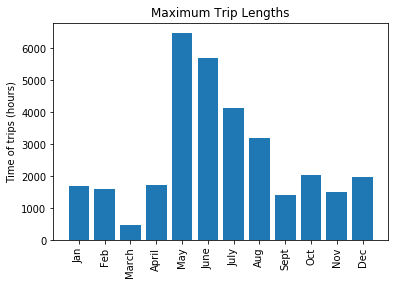

In [227]:
plt.bar(sav.index, sav['Max'], align='center')
plt.xticks(sav.index,  rotation = 'vertical')
plt.title('Maximum Trip Lengths')
plt.ylabel('Time of trips (hours)')
plt.show()  

In [ ]:
#Due to what seems to be a very skewed dataset, I cannot use the trip durations until that data is cleaned.